In [33]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_excel('customer_retention_dataset.xlsx',sheet_name='datasheet cleaned')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   Gender                                                                                269 non-null    object
 1   Age                                                                                   269 non-null    object
 2   City                                                                                  269 non-null    object
 3   Pincode                                                                               269 non-null    int64 
 4   Customer shopping online (in Years)                                                   269 non-null    object
 5   Purchase in last year                                                                 269 no

In [4]:
df.head()

,Gender,Age,City,Pincode,Customer shopping online (in Years),Purchase in last year,Source,Device,Screen Size,Operating System,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [5]:
df.nunique()

Gender                                                                   2
Age                                                                      5
City                                                                    11
Pincode                                                                 39
Customer shopping online (in Years)                                      5
                                                                        ..
Longer delivery period                                                   6
Change in website/Application design                                     7
Frequent disruption when moving from one page to another                 8
Website is as efficient as before                                        8
Which of the Indian online retailer would you recommend to a friend?     8
Length: 71, dtype: int64

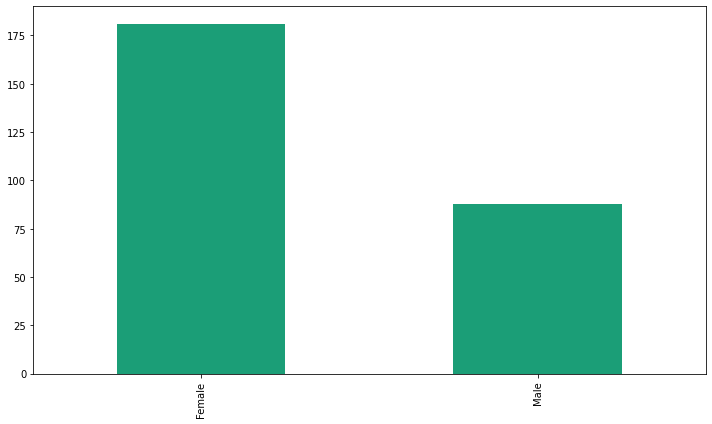

In [6]:
plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot(kind='bar',cmap='Dark2')
plt.tight_layout()
plt.show()

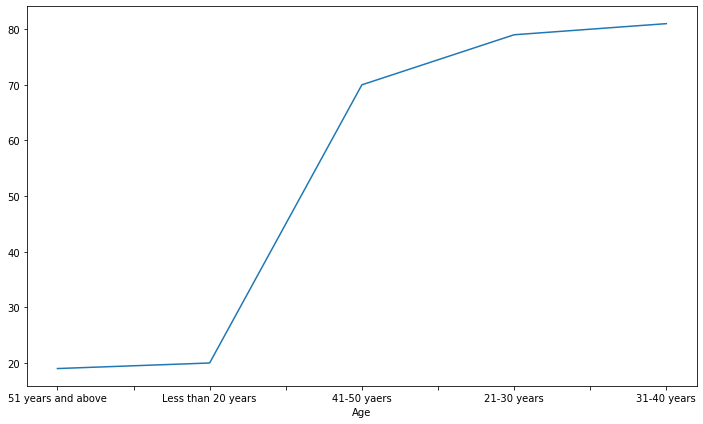

In [7]:
plt.figure(figsize=(10,6))
df.groupby(by='Age').count()['City'].sort_values().plot()
plt.tight_layout()
plt.show()
#This shows the count of customers in respect with age

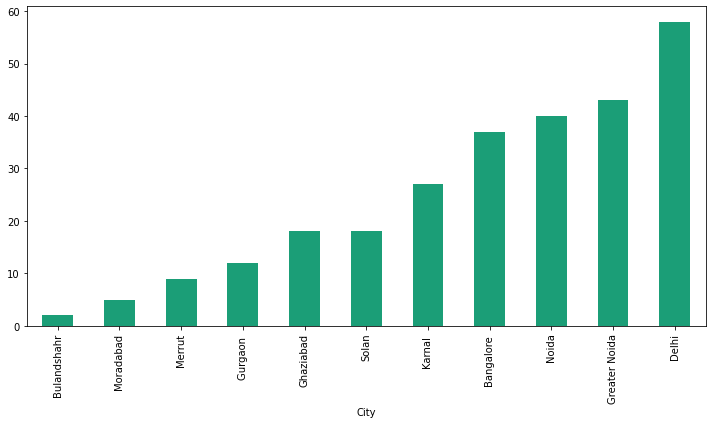

In [8]:
plt.figure(figsize=(10,6))
df.groupby(by='City').count()['Age'].sort_values().plot(kind='bar',cmap='Dark2')
plt.tight_layout()
plt.show()
#This shows the count of customers in respect with city

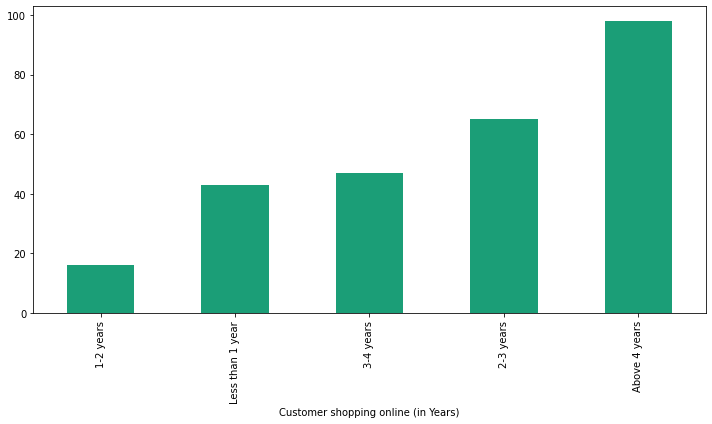

In [9]:
plt.figure(figsize=(10,6))
df.groupby(by='Customer shopping online (in Years)').count()['Age'].sort_values().plot(kind='bar',cmap='Dark2')
plt.tight_layout()
plt.show()
#This shows the count of customers in respect with city

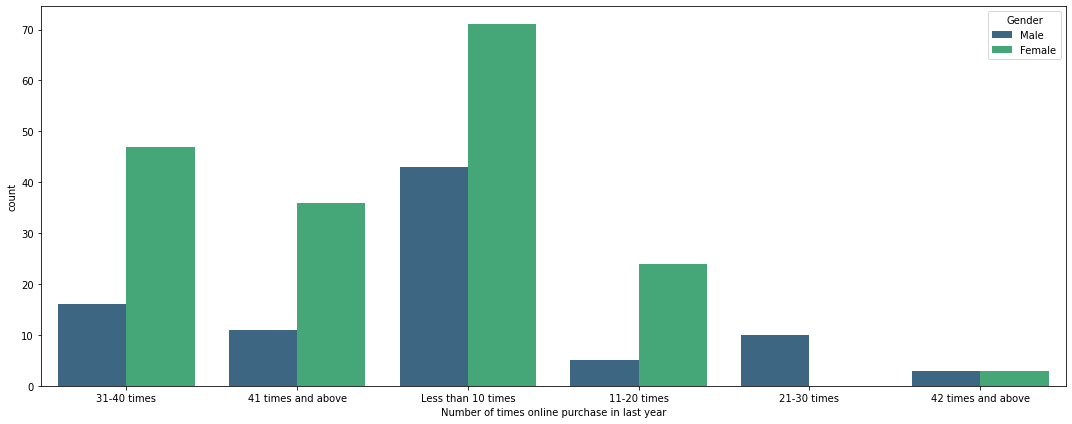

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(x='Purchase in last year',data=df,palette='viridis',hue='Gender')
plt.xlabel('Number of times online purchase in last year')
plt.tight_layout()
plt.show()

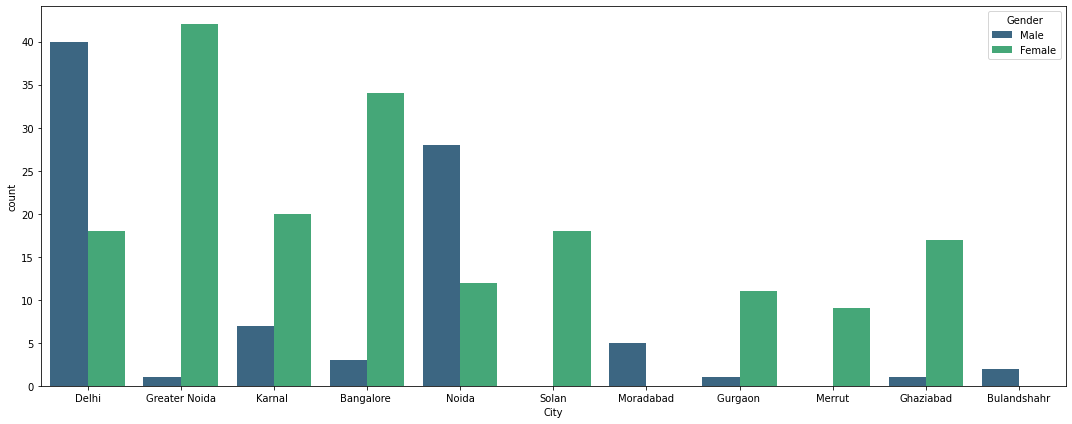

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='City',data=df,palette='viridis',hue='Gender')
plt.tight_layout()
plt.show()

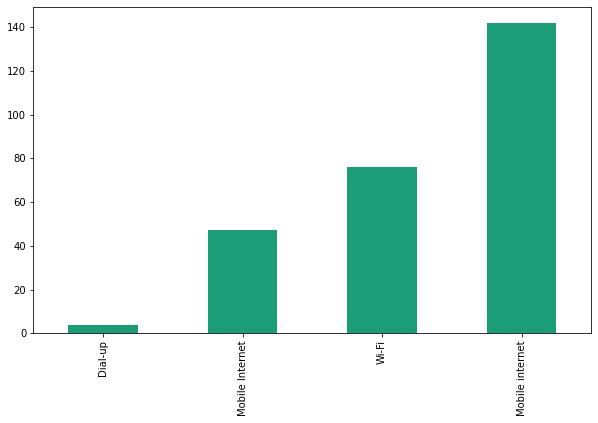

In [12]:
plt.figure(figsize=(10,6))
df['Source'].value_counts().sort_values().plot(kind='bar',cmap='Dark2')
plt.show()

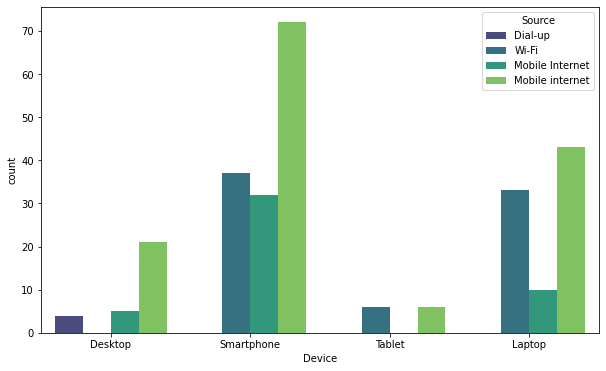

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='Device',hue='Source',data=df,palette='viridis')
plt.show()

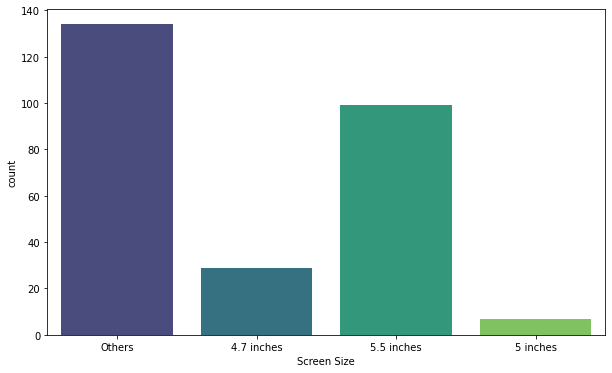

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='Screen Size',data=df,palette='viridis')
plt.show()

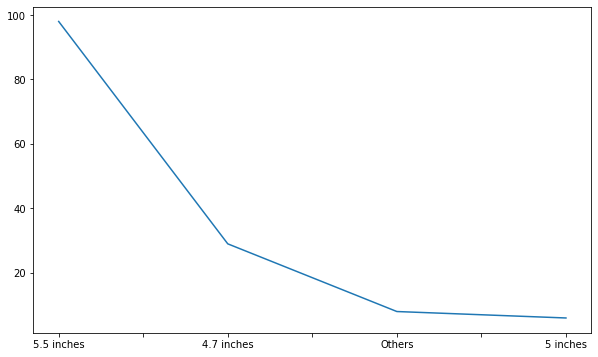

In [15]:
plt.figure(figsize=(10,6))
df[df['Device']=='Smartphone']['Screen Size'].value_counts().plot()
plt.show()

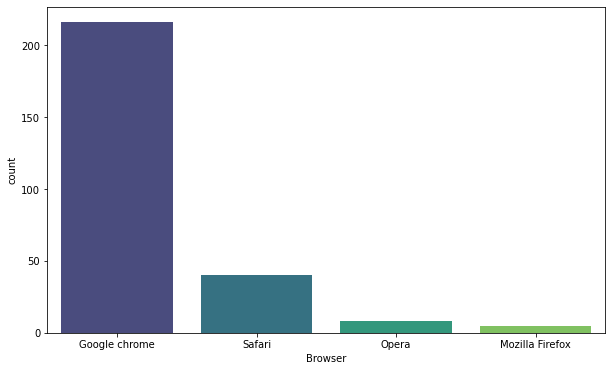

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Browser',data=df,palette='viridis')
plt.show()

In [27]:
df_coded=pd.read_excel('customer_retention_dataset.xlsx',sheet_name='codedsheet clean')

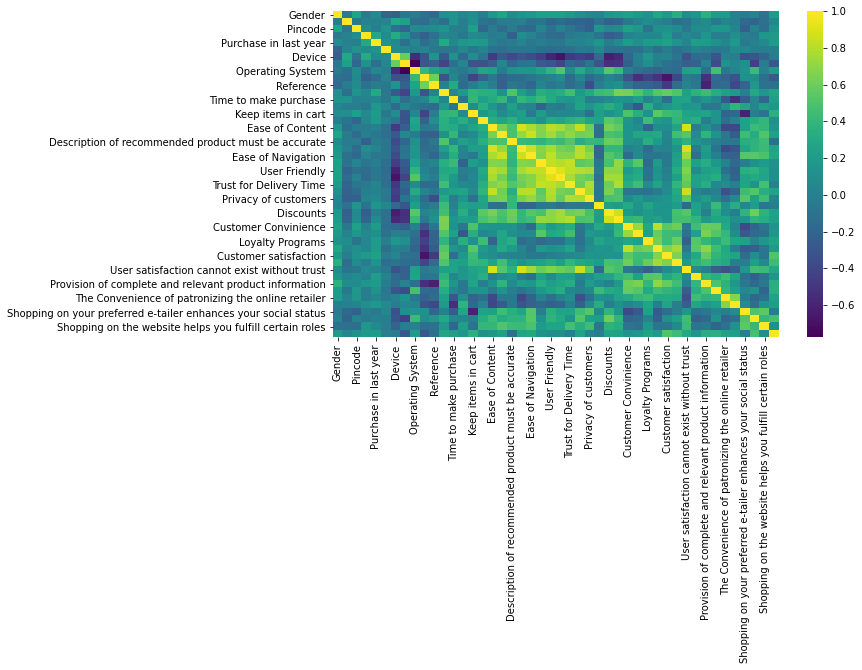

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df_coded.corr(),cmap='viridis')
plt.show()